In [1]:
from pathlib import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#data collection and processing 
#load the data 
calories_data = pd.read_csv('C:/Users/Kastriot/Desktop/calories_survey.csv')
exercise_data =  pd.read_csv("C:/Users/Kastriot/Desktop/exercise_survey.csv")

In [3]:
calories_data.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [4]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [5]:
# combining the two surveys 

calories_data = pd.concat([exercise_data, calories_data['Calories']], axis=1 )

In [6]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [7]:
#check the number of rows and columns

calories_data.shape

(19, 9)

In [8]:
#getting some info about the data

calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     19 non-null     int64  
 1   Gender      19 non-null     object 
 2   Age         19 non-null     int64  
 3   Height      19 non-null     int64  
 4   Weight      19 non-null     int64  
 5   Duration    19 non-null     int64  
 6   Heart_Rate  19 non-null     int64  
 7   Body_Temp   19 non-null     float64
 8   Calories    19 non-null     int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.3+ KB


In [9]:
#checking for missing values

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
#data analysis

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1.454710e+07,40.684211,168.736842,69.684211,14.421053,91.842105,39.847368,78.947368
std,2.503108e+06,15.592208,12.995051,14.325783,8.789614,8.454211,0.969174,61.565208
min,1.104232e+07,20.000000,146.000000,50.000000,1.000000,74.000000,37.800000,3.000000
25%,1.254492e+07,29.500000,157.000000,57.000000,7.500000,86.500000,39.250000,30.500000
50%,1.473336e+07,36.000000,171.000000,67.000000,14.000000,93.000000,40.200000,71.000000
75%,1.587342e+07,49.500000,179.000000,80.500000,21.500000,98.500000,40.500000,117.500000
max,1.960237e+07,69.000000,190.000000,94.000000,29.000000,105.000000,40.800000,231.000000


In [11]:
#data visualization

sns.set()

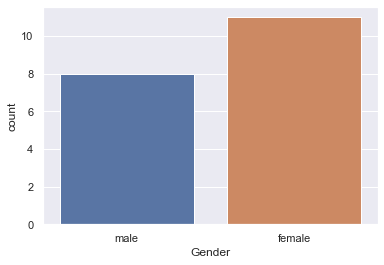

In [12]:
#plot the gender column in count plot
sns.countplot(calories_data['Gender'])

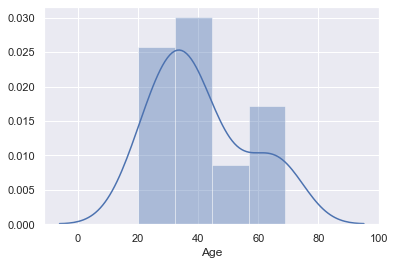

In [13]:
# find the distribution of Age columns

sns.distplot(calories_data['Age'])

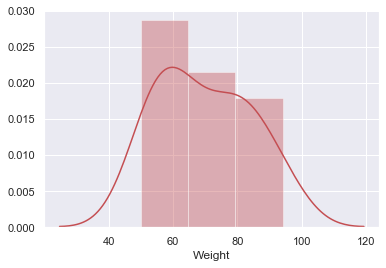

In [14]:
sns.distplot(calories_data['Weight'], color='r')

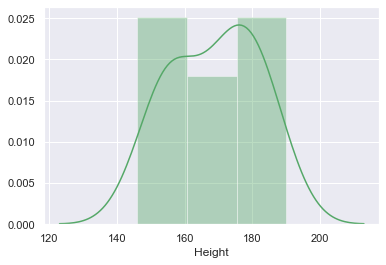

In [15]:
sns.distplot(calories_data['Height'], color='g')

In [16]:
#finding the correlation in the dataset
#positive or negative correlation

correlation= calories_data.corr()

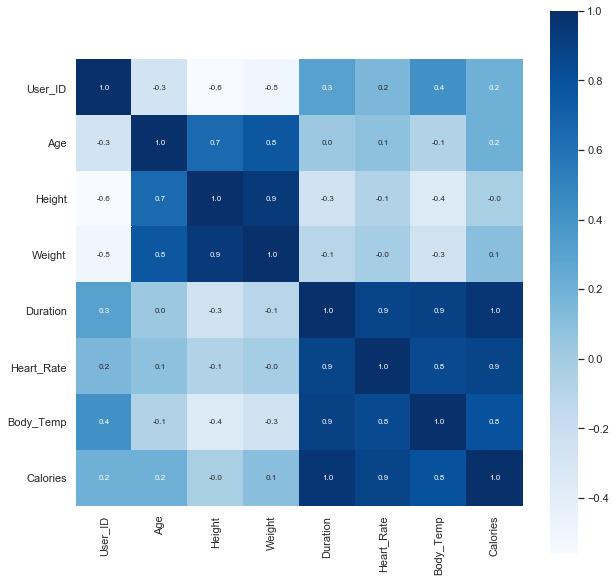

In [17]:
#constructing a heatmap to undertand the correlation

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True , square=True , fmt='.1f',annot=True, annot_kws={'size' :8},cmap='Blues')

In [18]:
#convert gender text to num

calories_data.replace({"Gender":{'male':0 ,'female':1}}, inplace=True)

In [19]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [20]:
#separate features and target 0row 1column

X = calories_data.drop(columns=['User_ID','Calories'], axis=1) 
Y = calories_data['Calories']

print(X)

    Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0        0   68     190      94        29         105       40.8
1        1   20     166      60        14          94       40.3
2        0   69     179      79         5          88       38.7
3        1   34     179      71        13         100       40.5
4        1   27     154      58        10          81       39.8
5        1   36     151      50        23          96       40.7
6        1   33     158      56        22          95       40.5
7        0   41     175      85        25         100       40.7
8        0   60     186      94        21          97       40.4
9        1   26     146      51        16          90       40.2
10       1   36     177      76         1          74       37.8
11       1   21     157      56        17         100       40.0
12       0   66     171      79        11          90       40.0
13       1   32     157      54        18          93       40.4
14       0   53     182  

In [21]:
print(Y)

0     231
1      66
2      26
3      71
4      35
5     123
6     112
7     143
8     134
9      72
10      3
11     92
12     58
13     88
14      7
15    170
16     11
17     43
18     15
Name: Calories, dtype: int64


In [22]:
#splitting the data into train and test data

X_train,X_test,Y_train,Y_test = train_test_split(X, Y ,test_size=0.3,random_state=2)

In [23]:
print(X.shape, X_train.shape , X_test.shape)

(19, 7) (13, 7) (6, 7)


In [24]:
#import the libraries and dependencies for the model Linear Regression

from sklearn import datasets , linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE


In [25]:
#model training and load the model
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(X_train,Y_train)
lrm_predictions = lrm.predict(X_test)

In [26]:
lrm_predictions[0:5]

array([ 76.22986953,  38.65458528,   9.53762373, 182.67936187,
         2.60290833])

Text(0, 0.5, 'Predicted Values')

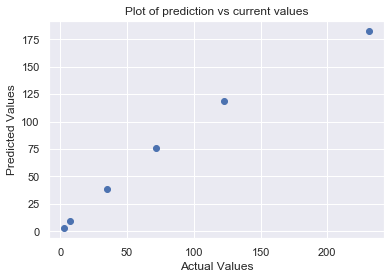

In [27]:
#plotting the predictions with a scatter plot ; there can be also data given for train which means contraty with predictions

plt.scatter(Y_test , lrm_predictions)
plt.title("Plot of prediction vs current values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [28]:
print('Score:', lrm_model.score(X_test, Y_test))

Score: 0.9369944728210345


In [29]:
print(lrm_predictions)


[ 76.22986953  38.65458528   9.53762373 182.67936187   2.60290833
 118.47878705]


In [30]:
#model training  K-nearest neightbor

#load the model , load libraries(import) and dependencies(from)
import scipy 

import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing ,model_selection ,neighbors


In [31]:
#be sure that the split of data is done onto train and test 
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3,random_state=2)

In [34]:
#be sure that the data are not messed up
print(X.shape, X_train.shape , X_test.shape)

(19, 7) (13, 7) (6, 7)


In [36]:
clf = neighbors.KNeighborsClassifier()
clf_model=clf.fit(X_train ,Y_train)
accuracy = clf.score(X_test,Y_test)

clf_predictions = clf.predict(X_test)
clf_predictions[0:5]


array([66, 15, 11, 26, 11], dtype=int64)

In [37]:
print('Score:', clf_model.score(X_test, Y_test))

Score: 0.0
